In [2]:
from bertopic import BERTopic
import csv
import pandas as pd
import pickle
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [4]:
loadPath = "/Users/ipinni/Library/CloudStorage/OneDrive-UniversityofLeeds/UKRI_Tweet_Data/completed/"

In [57]:
COPversion = 'COP25'

In [58]:
def get_data():
    model = BERTopic.load(loadPath + COPversion + "/" + COPversion + "_Bert_model", embedding_model = "all-mpnet-base-v2")

    with open(loadPath + COPversion + "/" + COPversion + "topics.list" ,'rb') as config_list_file:   
        topics = pickle.load(config_list_file)

    with open(loadPath + COPversion + "/" + COPversion + "docs.list", 'rb') as docs_list_file:   
        docs = pickle.load(docs_list_file)

    return(topics, docs, model)

topics, docs, model = get_data()

In [59]:
freq_df = model.get_topic_freq()
freq_df = freq_df.loc[freq_df.Topic != -1, :]
topics = sorted(freq_df.Topic.to_list())

In [60]:
# Select embeddings
embeddings = np.array(model.topic_embeddings)
all_topics = sorted(list(model.get_topics().keys()))
indices = np.array([all_topics.index(topic) for topic in topics])
embeddings = embeddings[indices]

In [61]:
distance_matrix = 1 - cosine_similarity(embeddings)
#Z = linkage(x, "ward")


In [62]:
fig = ff.create_dendrogram(distance_matrix,
                               orientation="left",
                               linkagefun=lambda x: linkage(x, "ward"),
                               color_threshold=1.5)

# Create nicer labels
axis = "xaxis"
new_labels = [[[str(topics[int(x)]), None]] + model.get_topic(topics[int(x)]) 
    for x in fig.layout["yaxis"]["ticktext"]]
new_labels = ["_".join([label[0] for label in labels[:4]]) for labels in new_labels]
new_labels = [label if len(label) < 30 else label[:27] + "..." for label in new_labels]

fig.update_layout(width=200+(15*len(topics)),
                          height=850,
                          xaxis=dict(tickmode="array",
                                     ticktext=new_labels))
fig.show()


array([10., 20.,  0.,  2.])

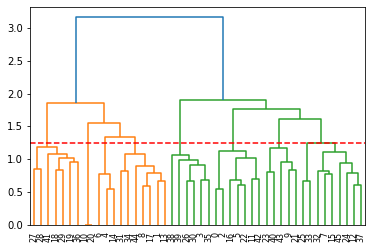

In [13]:
clusters = linkage(distance_matrix, method='ward')
#clusters.columns = ["idx1", "idx2", "dist", "sample_count"]
dendrogram(clusters)
plt.axhline(y=1.25, color='r', linestyle='--')
# All indices idx >= len(X) actually refer to the cluster formed in clusters[idx - len(topics)].
clusters[-10:,2]
clusters[0].round(3)

In [104]:
clusters2 = clusters.copy()
82-46

36

In [114]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(distance_matrix)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0])

In [138]:
mime = []
for i in range(1,8):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    mime.append(cluster.fit_predict(distance_matrix))

In [143]:
mime[0:4]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0]),
 array([1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1,
        0, 1]),
 array([0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 3, 3, 1, 0,
        0, 0, 0, 0, 2, 3, 3, 3, 2, 1, 0, 0, 1, 2, 3, 0, 2, 2, 0, 3, 0, 0,
        1, 0])]

In [147]:
dict(zip(list(range(46)), mime[0:2]))

{0: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 1: array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0])}

In [106]:
import networkx as nx
G = G=nx.from_numpy_matrix(distance_matrix.round(2))
edgelist = []
for line in nx.generate_edgelist(G):
    edgelist.append(line)

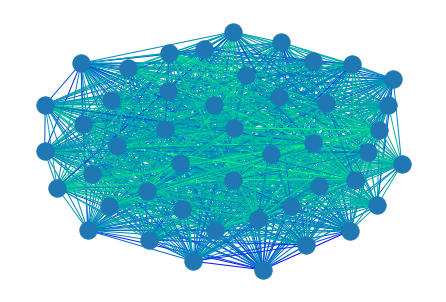

In [109]:
from matplotlib import cm

nx.draw(G,edge_color = [ i[2]['weight'] for i in G.edges(data=True) ], edge_cmap=cm.winter )

In [70]:
len(distance_matrix.round(2))

46

In [99]:
edgelist[0:46]

["0 1 {'weight': 0.4}",
 "0 2 {'weight': 0.23}",
 "0 3 {'weight': 0.43}",
 "0 4 {'weight': 0.34}",
 "0 5 {'weight': 0.34}",
 "0 6 {'weight': 0.38}",
 "0 7 {'weight': 0.41}",
 "0 8 {'weight': 0.48}",
 "0 9 {'weight': 0.49}",
 "0 10 {'weight': 0.5}",
 "0 11 {'weight': 0.32}",
 "0 12 {'weight': 0.43}",
 "0 13 {'weight': 0.46}",
 "0 14 {'weight': 0.37}",
 "0 15 {'weight': 0.3}",
 "0 16 {'weight': 0.35}",
 "0 17 {'weight': 0.47}",
 "0 18 {'weight': 0.42}",
 "0 19 {'weight': 0.46}",
 "0 20 {'weight': 0.5}",
 "0 21 {'weight': 0.5}",
 "0 22 {'weight': 0.28}",
 "0 23 {'weight': 0.49}",
 "0 24 {'weight': 0.35}",
 "0 25 {'weight': 0.43}",
 "0 26 {'weight': 0.48}",
 "0 27 {'weight': 0.58}",
 "0 28 {'weight': 0.53}",
 "0 29 {'weight': 0.56}",
 "0 30 {'weight': 0.36}",
 "0 31 {'weight': 0.49}",
 "0 32 {'weight': 0.44}",
 "0 33 {'weight': 0.41}",
 "0 34 {'weight': 0.51}",
 "0 35 {'weight': 0.47}",
 "0 36 {'weight': 0.51}",
 "0 37 {'weight': 0.41}",
 "0 38 {'weight': 0.6}",
 "0 39 {'weight': 0.45}",
 

In [62]:
df = pd.DataFrame([sub.split(" ") for sub in edgelist], columns = ["from", "to"])

In [65]:
df.to_csv("/Users/ipinni/Library/CloudStorage/OneDrive-UniversityofLeeds/UKRI FLF/Articles/COPxx_FFF/COP26Edges.csv", index=False)

In [23]:
np.array(model.topic_mapper.mappings)[0 +1]

array([ 0,  0,  0, 31, 31, 43])

In [28]:
len(model.hdbscan_model.labels_)

1136570

In [29]:
old_topic_labels = model.hdbscan_model.labels_
docs_df = pd.DataFrame({"Document": docs, "Topic": old_topic_labels, "to_count": docs})
documents_per_topic = docs_df.groupby(["Topic"], as_index=False).agg({"Document": " ".join, "to_count": "count"})
ctfidf, words = model._c_tf_idf(documents_per_topic, fit=False)
labels = sorted(list(documents_per_topic.Topic.unique()))
old_topics = model._extract_words_per_topic(words=words, c_tf_idf=ctfidf, labels=labels)